In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [3]:
df=pd.read_csv('homeprices.csv')
df.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000


In [4]:
dummies=pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [5]:
merge=pd.concat([df,dummies],axis='columns')
merge

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [21]:
final=merge.drop(['price','town','west windsor'] ,axis='columns')
final

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [7]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()


In [11]:
x=final
y=merge.price


In [12]:
model.fit(x,y)

LinearRegression()

In [13]:
model.predict(x)

array([539709.7398409 , 590468.71640508, 615848.20468716, 666607.18125134,
       717366.15781551, 579723.71533005, 605103.20361213, 668551.92431735,
       706621.15674048, 565396.15136531, 603465.38378844, 628844.87207052,
       692293.59277574])

In [14]:
model.predict([[2500, 0, 1]])

array([552706.40722426])

In [112]:

model.score(x,y)

0.9573929037221871

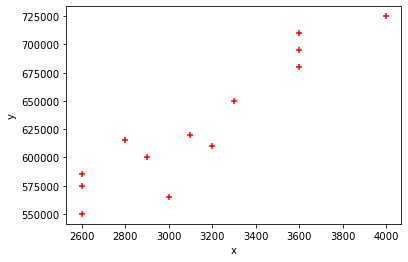

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(df.area,df.price, color='red',marker='+')